In [1]:
# 실습 1 - Error Back-Propagation 알고리즘 구현

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
   return x * (1 - x)

def compute_accuracy(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = np.mean(y_true == y_pred_binary)
    return accuracy

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {
            'W1': weight_init_std * np.random.randn(input_size, hidden_size),
            'b1': np.zeros(hidden_size),
            'W2': weight_init_std * np.random.randn(hidden_size, output_size),
            'b2': np.zeros(output_size)
        }

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)
        
        return y
    
    # Back Propagation
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [2]:
# 실습 2 - Two-Layer Neural Network “Training”

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
raw_data = pd.read_csv("NN_data.csv", header=0, names=['', 'x0', 'x1', 'x2', 'y'])
X = raw_data[['x0', 'x1', 'x2']].to_numpy()
y = raw_data['y'].to_numpy()

# 타겟 레이블 One-Hot Encoding
y_oh = []
for label in y:
    if label == 1:
        y_oh.append([1, 0, 0])
    elif label == 2:
        y_oh.append([0, 1, 0])
    else:
        y_oh.append([0, 0, 1])
Y = np.array(y_oh)

# 데이터 분할 (70% train, 30% test)
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# 데이터 정규화
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# 하이퍼 파라미터 설정
input_size = X_train.shape[1]
hidden_size = 5
output_size = Y_train.shape[1]
learning_rate = 0.001
epochs = 20_000

# 네트워크 초기화
network = TwoLayerNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# 훈련
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):
    y_train_pred = network.predict(X_train)
    train_loss = np.sum((y_train_pred - Y_train) ** 2) / (2 * X_train.shape[0])
    train_accuracy = compute_accuracy(Y_train, y_train_pred)
        
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
        
    y_test_pred = network.predict(X_test)
    test_loss = np.sum((y_test_pred - Y_test) ** 2) / (2 * X_test.shape[0])
    test_accuracy = compute_accuracy(Y_test, y_test_pred)
        
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
        
    grads = network.gradient(X_train, Y_train)
        
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grads[key]
        
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# 학습 결과 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.plot(range(len(test_losses)), test_losses, label='Test Loss')    
plt.xlabel('Epochs')    
plt.ylabel('MSE Loss')
plt.title('Epochs vs Train/Test Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_accuracies)), train_accuracies, label='Train Accuracy')
plt.plot(range(len(test_accuracies)), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Train/Test Accuracy')
plt.legend()

plt.show()

# 최종 모델 평가 (Test 데이터)
y_test_pred = network.predict(X_test)
test_loss = np.sum((y_test_pred - Y_test) ** 2) / (2 * X_test.shape[0])
test_accuracy = compute_accuracy(Y_test, y_test_pred)

print(f"Final Train Loss: {train_losses[-1]:.4f}, Final Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Test Loss: {test_loss:.4f}, Final Test Accuracy: {test_accuracy:.4f}")

# 예측 결과 확인
print("Predictions:", y_test_pred)
print("True labels:", Y_test)

KeyboardInterrupt: 

Sample 1: True Label: 2, Predicted Label: 1
Sample 2: True Label: 2, Predicted Label: 1
Sample 3: True Label: 2, Predicted Label: 0
Sample 4: True Label: 2, Predicted Label: 0
Sample 5: True Label: 2, Predicted Label: 0
Sample 6: True Label: 2, Predicted Label: 1
Sample 7: True Label: 2, Predicted Label: 1
Sample 8: True Label: 2, Predicted Label: 0
Sample 9: True Label: 2, Predicted Label: 1
Sample 10: True Label: 2, Predicted Label: 1
Sample 11: True Label: 2, Predicted Label: 1
Sample 12: True Label: 2, Predicted Label: 0
Sample 13: True Label: 2, Predicted Label: 1
Sample 14: True Label: 2, Predicted Label: 1
Sample 15: True Label: 2, Predicted Label: 0
Sample 16: True Label: 2, Predicted Label: 0
Sample 17: True Label: 2, Predicted Label: 1
Sample 18: True Label: 2, Predicted Label: 1
Sample 19: True Label: 2, Predicted Label: 1
Sample 20: True Label: 2, Predicted Label: 0
Sample 21: True Label: 2, Predicted Label: 1
Sample 22: True Label: 2, Predicted Label: 1
Sample 23: True Lab

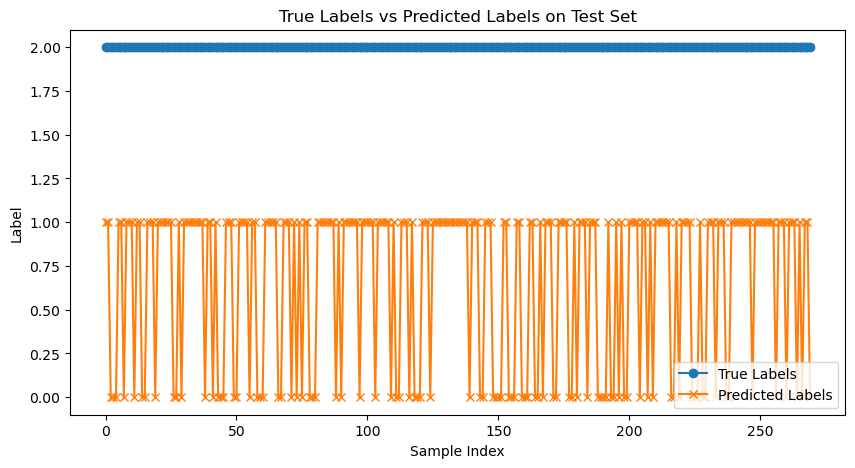

In [31]:
# 실습 3 - Two-Layer Neural Network "Test"

# 최종 모델 평가 (Test 데이터)
# Test Set 결과 출력
for i in range(len(X_test)):
    true_label = np.argmax(Y_test[i])
    predicted_label = np.argmax(y_test_pred[i])
    print(f"Sample {i+1}: True Label: {true_label}, Predicted Label: {predicted_label}")

# Test Set에 대한 예측 결과 시각화
plt.figure(figsize=(10, 5))

plt.plot(np.argmax(Y_test, axis=1), label='True Labels', marker='o')
plt.plot(np.argmax(y_test_pred, axis=1), label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('True Labels vs Predicted Labels on Test Set')
plt.legend()
plt.show()